# MNIST digit classification using PyTorch

# Load torch and torchvision libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST training and test dataset batches

60000 images in training dataset.
10000 images in test dataset.
Each image is a torch.FloatTensor with torch.Size([1, 28, 28]).


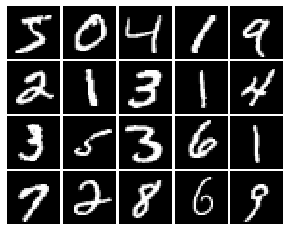

In [2]:
train_dataset = datasets.MNIST('./data', train=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST('./data', train=False, transform=transforms.ToTensor())

fig = plt.figure()
for loop in range(20):
    fig.add_subplot(4,5,loop+1)
    plt.imshow(np.array(train_dataset[loop][0]).squeeze(), cmap='gray')
    plt.axis('off')
plt.subplots_adjust(wspace=0, hspace=0.05)
fig.set_size_inches(5,4)

print(f'{len(train_dataset)} images in training dataset.')
print(f'{len(test_dataset)} images in test dataset.')
print(f'Each image is a {train_dataset[loop][0].type()} with {train_dataset[loop][0].shape}.')

# Load dataset in batches for training

In [3]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10000, shuffle=True)

print(train_loader.batch_size)

64


# Define neural network model


In [4]:
class Net(nn.Module):
    """Two fully connected linear neuron layers"""
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 15)
        self.fc2 = nn.Linear(15, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.fc2(x)
        # convert to log probability
        output = F.log_softmax(x, dim=1)
        return output

# Training routine

In [5]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()   

# Test accuracy routine

In [6]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Run training

In [7]:
torch.manual_seed(111)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=1e-3)

n_epochs = 30
for epoch in range(1, n_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    print(f'Epoch: {epoch} / {n_epochs}')
    test(model, device, test_loader)

Epoch: 1 / 30
Test set: Average loss: 1.9949, Accuracy: 5333/10000 (53%)

Epoch: 2 / 30
Test set: Average loss: 1.6849, Accuracy: 6276/10000 (63%)

Epoch: 3 / 30
Test set: Average loss: 1.3968, Accuracy: 7026/10000 (70%)

Epoch: 4 / 30
Test set: Average loss: 1.1576, Accuracy: 7653/10000 (77%)

Epoch: 5 / 30
Test set: Average loss: 0.9753, Accuracy: 7973/10000 (80%)

Epoch: 6 / 30
Test set: Average loss: 0.8428, Accuracy: 8209/10000 (82%)

Epoch: 7 / 30
Test set: Average loss: 0.7469, Accuracy: 8345/10000 (83%)

Epoch: 8 / 30
Test set: Average loss: 0.6759, Accuracy: 8451/10000 (85%)

Epoch: 9 / 30
Test set: Average loss: 0.6221, Accuracy: 8528/10000 (85%)

Epoch: 10 / 30
Test set: Average loss: 0.5804, Accuracy: 8600/10000 (86%)

Epoch: 11 / 30
Test set: Average loss: 0.5475, Accuracy: 8664/10000 (87%)

Epoch: 12 / 30
Test set: Average loss: 0.5205, Accuracy: 8700/10000 (87%)

Epoch: 13 / 30
Test set: Average loss: 0.4984, Accuracy: 8728/10000 (87%)

Epoch: 14 / 30
Test set: Average l

# Reference

Adapted from [PyTorch Basic MNIST Example](https://github.com/pytorch/examples/blob/master/mnist/main.py)